<a href="https://colab.research.google.com/github/sejin-sim/Hands_On_ML/blob/master/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter6_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 결정 트리 학습과 시각화

- 결정 트리를 이해하기 위해 모델 하나를 만들어서 어떻게 예측하는지 살펴보겠다.

In [25]:
import numpy as np
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (12,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정
gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

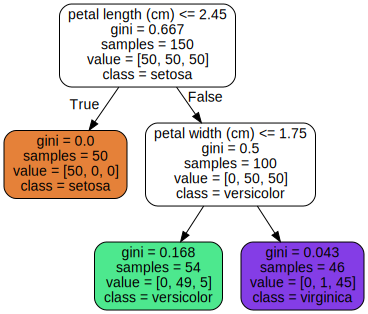

In [27]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

- 루트 노드(root node) : 맨 꼭대기의 노드

- 부모 노드(parent node) : 자식노드를 가지는 노드

- 자식 노드(child node) : 부모가 있는 노드

- 리프 노드(leaf node) : 자식을 가지지 않는 노드

## 2. 예측하기

1. 위의 그림을 보면 결정트리 분류기 (DecisionTreeClassifier)를 사용한 결과로, 변수로 사용한 꽃잎 길이(petal length)와 꽃잎 너비(petal width)의 조건에 따라 분류해 주었다.
 - sample : 적용된 훈렴샘플 수
 - value : 각 범주(target)에 존재하는 훈련 샘플의 수, 모두 더하면 sample수와 같다.
 - gini : 불순도(impurity) 측정

2. gini에 대한 추가설명
 - 한 노드의 샘플이 모두 같은 범주라면(정확하게 분류) gini지수 = 0(깨끗)
 - Gini ↑ : 불순도 ↑, Gini ↓ : 불순도 ↓

$$G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^{2}}$$
> - $p_{i,k} $ : i번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율
> - ex) 깊이 2의 왼쪽 노드의 gini점수 : $1-(0/54)^{2}-(49/54)^{2}-(5/54)^{2} = 0.168$

3. 사이킷런은 이진트리만 만드는 CART알고리즘을 사용

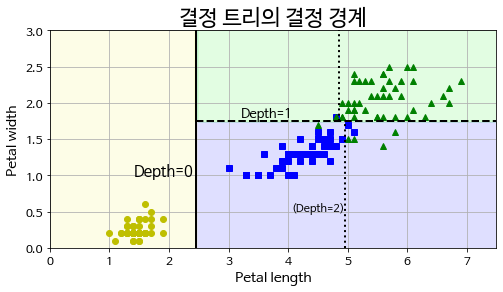

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title("결정 트리의 결정 경계")
plt.show()

- 굵은 수직선이 루트 노드(깊이 0)의 결정 경계(꽃잎 길이=2.45cm)를 나타낸다.

- 왼쪽 영역은 순수 노드(Iris-Setosa만 있음)이기 때문에 더는 나눌 수 없습니다.

- 오른쪽 영역은 순수노드가 아님으로 깊이 1의 오른쪽 노드는 꽃잎너비 =1.75cm에서 나누어집니다(파선).

- max_depth = 2를 설정했기 때문에 더는 분할되지 않는다.

- Petal length = 4.85 ~ 4.95 값의 점선은 max_depth = 3으로 설정했을 때 나눠지는 가상의 선이다.

## 3. 클래스(범주)의 확률 추정

1. 클래스의 확률 추정이란, 어떤 샘플이 특정 클래스 k에 속할 확률을 추정하는 것으로 과정은 다음과 같다.
 - 특정 샘플이 속하는 리프노드 탐색   
 - 해당 노드의 훈련샘플과 클래스k의 비율 반환   
 - 높은 확률을 가진 클래스를 출력

2. ex) 길이 5, 너비 1.5인 샘플을 예측 해보자

In [29]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

- 0%(0/54), 90.7%(49/54), 9.3%(5/54)

In [30]:
tree_clf.predict([[5, 1.5]])

array([1])

- 길이 5, 너비 1.5를 넣었을 때 = 가장 높은 확률을 가진 클래스를 output

## 4. CART 훈련 알고리즘

1. 사이킷런은 결정 트리를 훈련시키기 위해, CART(Classification And Regression Tree)알고리즘을 사용한다.
 - 먼저 하나의 변수k의 임계값 tk를 사용해 가장 순수한(불순도가 낮은) 두 서브셋으로 나눈다.
 - 같은 방식으로 서브셋을 또 나누기 위한 변수k와 임계값 tk를 찾는 과정을 반복
 - max_depth가 되거나, 불순도를 더이상 줄이는 분할을 찾을 수 없다면 중단

2. 분류에 대한 CART 비용 함수

$$
J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}
$$

- $G_\text{left/right}$는 왼쪽/오른쪽 서브셋의 불순도
- $m_\text{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수

 > <img src="https://blog.kakaocdn.net/dn/0i16i/btqDADNwhps/srLE0hDPJMQ4Z1bSgLPLZK/img.png" width = 70%>


3. CART 알고리즘은 : 탐욕적 알고리즘(greedy algorithm)이다.
 - 맨 위 루트노드에서 최적의 분할을 찾으며 이어지는 각 단계에서 이 과정을 반복한다.
 - 분할이 몇 단계를 거쳐 낮은 불순도로 이어질 수 있을지 고려하지 x
 - 그래서 탐욕적 알고리즘은 종종 납득할 만한 솔류션을 나타내지만 최적의 솔류션을 보장하지 않는다.

## 5. 계산 복잡도

1. 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야 한다.

2. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(log){2}(m))$개의 노드를 거쳐야 한다.

3. 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 변수의 수와 무관하게 $O(log){2}(m))$이다.

4. 훈련 알고리즘은 모든 훈련 샘플의 모든 특성을 비교한다.
> $O(n \; \text{x} \; m \; log_{2}(m))$

5. 훈련 데이터 셋이 적을 경우 presort=True를 지정하면 미리 데이터를 정렬하여 속도를 개선할 수 있다.

## 6. 지니 불순도 또는 엔트로피

1. 엔트로피(entropy) 지정
 - DecisionTreeClassifierd의 default매개변수는 gini
 - DescisionTreeRegressor의 default매개변수는 mse
 - gini 불순도 말고 엔트로피(entropy)로 지정하여 사용할 수 있다.

$$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$$

   - 엔트로피(entropy) 불순도도 마찬가지로 순수한 샘플만이 존재할때 0이 된다.

2. ex) 첫 그림의 깊이 2의 왼쪽 노드의 엔트로피

$$-{\dfrac{49}{54}}log_{2}\dfrac{49}{54} \approx  0.445$$

3. 차이점 : 둘다 비슷한 트리를 만들어 낸다.
 - 지니불순도 : 가장 빈도 높은 클래스를 먼저 분할하고 나머지를 고립시키는 경향
 - 엔트로피 : 균형잡힌 트리를 만듬

## 7. 규제 매개변수

1. 결정 트리는 훈련데이터에 대한 제약 사항이 거의 없다 = 제한을 두지 않아서 과대 적합 되기 쉽다.

2. 매개변수
- max_depth : default는 None으로 최대 깊이까지 학습해, 과대적합 가능성이 있으므로 제한을 주면 좋다.
- min_samples_split : 분할되기 위해 노드가 가져야하는 최소 샘플 수
- min_samples_leaf : 리프 노드가 가져야할 최소 샘플 수
- min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- max_leaf_nodes : 리프 노드의 최대 수
- max_features : 각 노드에서 분할에 사용할 변수의 최대 수



In [31]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

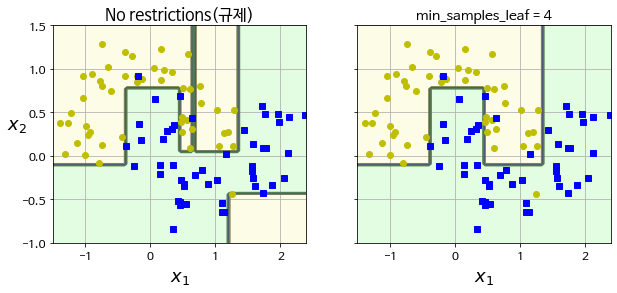

In [33]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions(규제)", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

- 규제를 안준 왼쪽 모델은 과대적합되어 있다.

- min_samples_leaf=4 를 준 오른쪽 모델이 성능이 좋다.

</br>

3. 가지치기(pruning) 알고리즘
- 순도를 높일 수 있다.
- $X^{2}$(chi-squared test)검정 : 확률을 p-값이라고 부르며, 임계값 보다 높으면 그 노드는 불필요한 것으로 간주되고 삭제 된다.
- 가지치기는 불필요한 노드가 모두 없어질 때 까지 계속된다.

## 8. 회귀(Regression)

- 사이킷런의 DecisionTreeRegressor을 이용해 노이즈가 섞인 2차함수 형태의 데이터셋에서 회귀트리를 만들어보자.

In [34]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

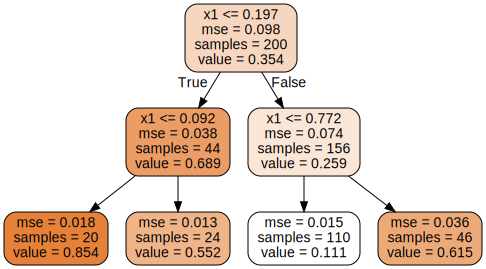

In [36]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

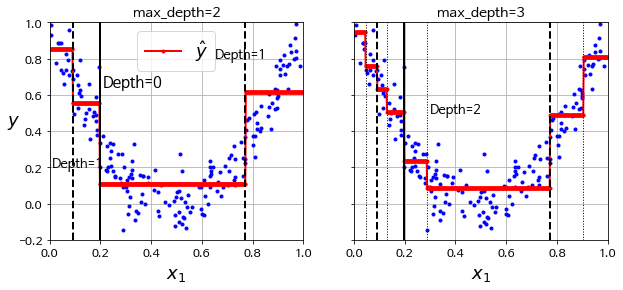

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [38]:
X[X < 0.197].mean()

0.10119149791133175

- 왼쪽 그래프는 max_depth를 2, 오른쪽은 3으로 설정했을때의 결과이다.

- X1은 rand로 0~1값이며, 각 점들은 sample, 빨간선은 예측값(적합값)을 의미한다.

- 각 영역의 예측값은 항상 그 영역에 있는 타깃값(실제값)의 평균이 된다.

- 그럼 max_depth를 주지 않으면 어떨까?

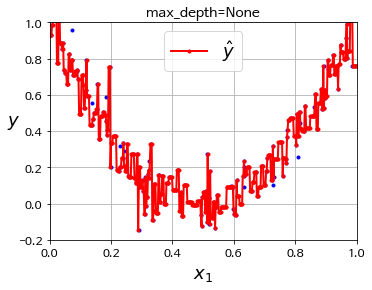

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg3.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(5.5, 4))
plot_regression_predictions(tree_reg3, X, y)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=None", fontsize=14)

plt.show()

- 거의 모든 점이 훈련데이터에 완벽하게 훈련(과대적합)된 결과를 초래

- 회귀문제에서 CART알고리즘은 앞에서 설명한것과 마찬가지로 불순도 대신 MSE를 최소화 하도록 분할 한다.

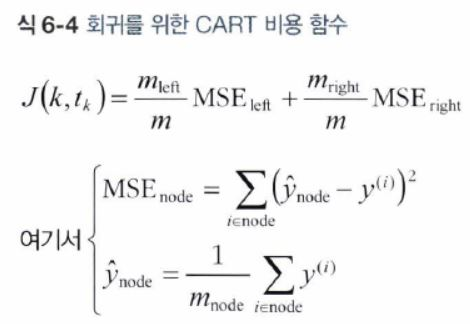

## 9. 불안정성

1. 결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 성능도 뛰어나다.

2. 하지만 결정 트리는 계단 모양의 결정 경계를 만들기 때문에, 훈련 세트의 회전에 민감하다. = 잘 일반화될 수 없다.


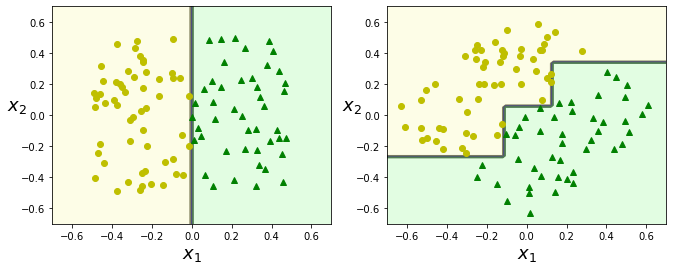


- 오른쪽 그림과 같이 데이터 셋을 45도 회전시키면, 결정 트리 모델이 불필요하게 구불구불해지는 것을 확인할 수 있다. 

- 결정트리의 가장 큰 문제는 훈련 데이터 셋의 작은 변화에도 매우 민감하다는 것인데, 훈련 데이터 셋에서 Versicolor 중 가장 넓은 데이터를 제거하고 훈련시켜보자.

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장넓은(max petal width) versicolor

array([[4.8, 1.8]])

In [45]:
ot_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

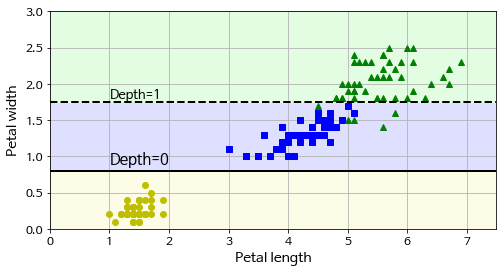

In [46]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

- 한개의 데이터셋만 제거했을뿐인데, 굉장히 다른 결과를 반환한다.

- 이러한 불안정성 극복을 위해 랜덤포레스트(RandomForest)는 많은 결정트리에서 만든 예측을 평균하는 방법을 사용한다.
 - PCA(주성분 분석) 기법 : 훈련 데이터를 더 좋은 방향으로 회전시킨다.
 - 다음 장에서 배울 랜덤 포레스트 : 많은 트리에서 만든 예측을 평균내서 이런 불안정성을 극복할 수 있다.